In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

/home/rasel/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
df=pd.read_csv("/home/rasel/Downloads/MLproject/training_data.csv")
df2=pd.read_csv("/home/rasel/Downloads/MLproject/training_data_targets.csv",header=None)
df2.columns=['target']

df=df.join(df2.target)

df.to_csv('ml_data.csv', index=False)


In [ ]:
df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,target
0,1,1,0,28,1,0,0,1,1,1,...,1,3,0,0,0,0,9,5,3,0
1,0,0,1,24,0,0,0,1,1,1,...,0,2,0,0,0,0,8,6,8,0
2,1,0,1,32,0,0,1,1,1,1,...,0,2,0,2,0,1,11,6,8,2
3,0,0,1,25,1,0,0,1,1,1,...,0,2,0,0,0,0,6,6,8,0
4,1,1,1,26,1,0,0,1,1,0,...,0,2,3,3,1,0,9,3,1,0


In [ ]:
df.shape

(228312, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228312 entries, 0 to 228311
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                228312 non-null  int64
 1   HighChol              228312 non-null  int64
 2   CholCheck             228312 non-null  int64
 3   BMI                   228312 non-null  int64
 4   Smoker                228312 non-null  int64
 5   Stroke                228312 non-null  int64
 6   HeartDiseaseorAttack  228312 non-null  int64
 7   PhysActivity          228312 non-null  int64
 8   Fruits                228312 non-null  int64
 9   Veggies               228312 non-null  int64
 10  HvyAlcoholConsump     228312 non-null  int64
 11  AnyHealthcare         228312 non-null  int64
 12  NoDocbcCost           228312 non-null  int64
 13  GenHlth               228312 non-null  int64
 14  MentHlth              228312 non-null  int64
 15  PhysHlth              228312 non-n

In [ ]:
# unique values in each column
print("\nUnique Values:")
for col in df.columns:
    print(col, df[col].nunique())


Unique Values:
HighBP 2
HighChol 2
CholCheck 2
BMI 84
Smoker 2
Stroke 2
HeartDiseaseorAttack 2
PhysActivity 2
Fruits 2
Veggies 2
HvyAlcoholConsump 2
AnyHealthcare 2
NoDocbcCost 2
GenHlth 5
MentHlth 31
PhysHlth 31
DiffWalk 2
Sex 2
Age 13
Education 6
Income 8
target 3


In [ ]:
# Calculate the minimum and maximum values for all columns
min_values = df.min()
max_values = df.max()

# Print the results
print("Minimum values for each column:")
print(min_values)

print("\nMaximum values for each column:")
print(max_values)


Minimum values for each column:
HighBP                   0
HighChol                 0
CholCheck                0
BMI                     12
Smoker                   0
Stroke                   0
HeartDiseaseorAttack     0
PhysActivity             0
Fruits                   0
Veggies                  0
HvyAlcoholConsump        0
AnyHealthcare            0
NoDocbcCost              0
GenHlth                  1
MentHlth                 0
PhysHlth                 0
DiffWalk                 0
Sex                      0
Age                      1
Education                1
Income                   1
target                   0
dtype: int64

Maximum values for each column:
HighBP                   1
HighChol                 1
CholCheck                1
BMI                     98
Smoker                   1
Stroke                   1
HeartDiseaseorAttack     1
PhysActivity             1
Fruits                   1
Veggies                  1
HvyAlcoholConsump        1
AnyHealthcare            1
NoDo

In [ ]:
df.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,target
count,228312.000000,228312.000000,228312.00000,228312.000000,228312.000000,228312.000000,228312.000000,228312.000000,228312.000000,228312.000000,...,228312.000000,228312.000000,228312.000000,228312.000000,228312.000000,228312.000000,228312.000000,228312.000000,228312.000000,228312.000000
mean,0.429014,0.424660,0.96274,28.387535,0.443380,0.040620,0.094358,0.756535,0.634093,0.811560,...,0.084043,2.510569,3.178755,4.236987,0.168243,0.439942,8.036849,5.050357,6.054548,0.296918
std,0.494936,0.494292,0.18940,6.617483,0.496785,0.197408,0.292326,0.429174,0.481685,0.391064,...,0.277453,1.068077,7.403429,8.716479,0.374083,0.496381,3.053697,0.985780,2.070492,0.698156
min,0.000000,0.000000,0.00000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.00000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,0.000000
50%,0.000000,0.000000,1.00000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000
75%,1.000000,1.000000,1.00000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,0.000000
max,1.000000,1.000000,1.00000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,2.000000


In [ ]:
# Value count for each value
for i in df.columns:
    print(i,'\n',df[i].value_counts())
    print('-'*90)

HighBP 
 0    130363
1     97949
Name: HighBP, dtype: int64
------------------------------------------------------------------------------------------
HighChol 
 0    131357
1     96955
Name: HighChol, dtype: int64
------------------------------------------------------------------------------------------
CholCheck 
 1    219805
0      8507
Name: CholCheck, dtype: int64
------------------------------------------------------------------------------------------
BMI 
 27    22128
26    18444
24    17651
25    15420
28    14894
      ...  
86        1
78        1
90        1
96        1
91        1
Name: BMI, Length: 84, dtype: int64
------------------------------------------------------------------------------------------
Smoker 
 0    127083
1    101229
Name: Smoker, dtype: int64
------------------------------------------------------------------------------------------
Stroke 
 0    219038
1      9274
Name: Stroke, dtype: int64
-------------------------------------------------------------

In [ ]:
# Assuming you have a DataFrame 'df' containing your data
# Replace 'YourTargetColumn' with the actual column containing the class labels
target_column = 'target'

# Get a list of unique class labels
class_labels = df[target_column].unique()

# Iterate through the features and count instances for each class label
for col in df.columns:
    print(f'Counts for Feature: {col}')
    for class_label in class_labels:
        class_df = df[df[target_column] == class_label]
        counts = class_df[col].value_counts()
        print(f'Class {class_label}:\n{counts}\n')


Counts for Feature: HighBP
Class 0:
0    120949
1     71384
Name: HighBP, dtype: int64

Class 2:
1    23957
0     7854
Name: HighBP, dtype: int64

Class 1:
1    2608
0    1560
Name: HighBP, dtype: int64

Counts for Feature: HighChol
Class 0:
0    119277
1     73056
Name: HighChol, dtype: int64

Class 2:
1    21313
0    10498
Name: HighChol, dtype: int64

Class 1:
1    2586
0    1582
Name: HighChol, dtype: int64

Counts for Feature: CholCheck
Class 0:
1    184098
0      8235
Name: CholCheck, dtype: int64

Class 2:
1    31597
0      214
Name: CholCheck, dtype: int64

Class 1:
1    4110
0      58
Name: CholCheck, dtype: int64

Counts for Feature: BMI
Class 0:
27    19271
26    16407
24    16115
25    13917
23    13054
      ...  
90        1
86        1
91        1
83        1
80        1
Name: BMI, Length: 81, dtype: int64

Class 2:
27    2468
30    2083
28    2025
29    2005
32    1917
      ... 
78       1
80       1
83       1
95       1
85       1
Name: BMI, Length: 76, dtype: int64


In [ ]:
# For each column, get value counts in decreasing order and take the index (value) of most common class
print("\nClass with highest count for each feature:")
for col in df.columns:
    print(col, df[col].value_counts().index[0])


Class with highest count for each feature:
HighBP 0
HighChol 0
CholCheck 1
BMI 27
Smoker 0
Stroke 0
HeartDiseaseorAttack 0
PhysActivity 1
Fruits 1
Veggies 1
HvyAlcoholConsump 0
AnyHealthcare 1
NoDocbcCost 0
GenHlth 2
MentHlth 0
PhysHlth 0
DiffWalk 0
Sex 0
Age 9
Education 6
Income 8
target 0


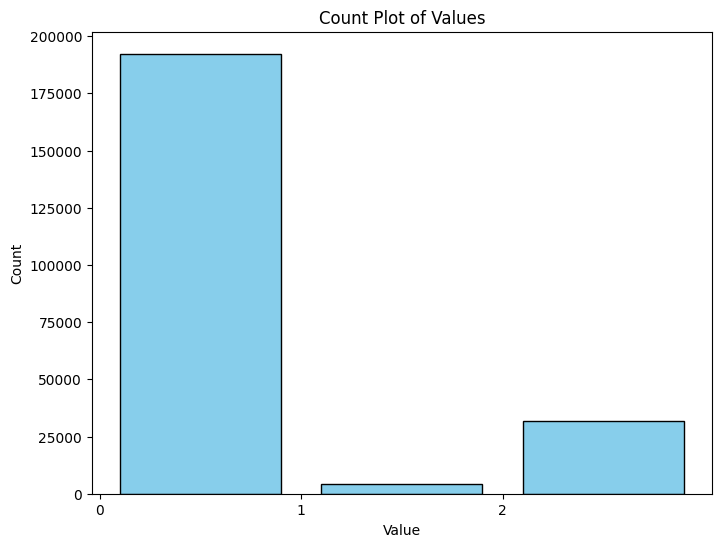

In [ ]:
# Load your CSV file with a single column and assign a column name
column_name = "Diabetes"  # Replace with your desired column name

data_labels_df = pd.read_csv("/content/training_data_targets.csv", names=[column_name])

# Create a count plot to visualize the frequency of each value
plt.figure(figsize=(8, 6))
plt.hist(data_labels_df.iloc[:, 0], bins=[0, 1, 2, 3], rwidth=0.8, color='skyblue', edgecolor='black')
plt.title("Count Plot of Values")
plt.xlabel("Value")
plt.ylabel("Count")
plt.xticks([0, 1, 2])  # Set x-axis ticks to 0, 1, and 2 for discrete values
plt.show()

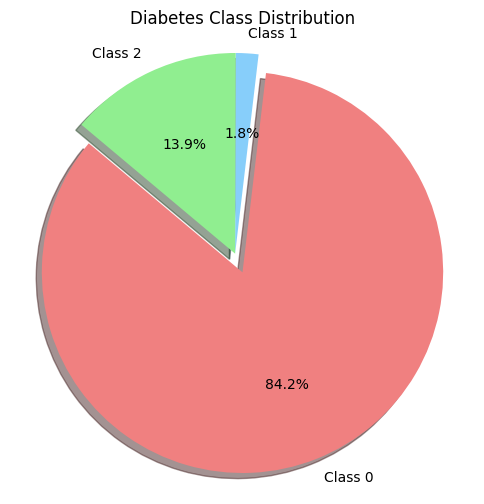

In [ ]:
import matplotlib.pyplot as plt

# Calculate the counts of each diabetes class
class_0_count = (df['target'] == 0).sum()
class_1_count = (df['target'] == 1).sum()
class_2_count = (df['target'] == 2).sum()

# Create a pie chart
labels = ['Class 0', 'Class 1', 'Class 2']
sizes = [class_0_count, class_1_count, class_2_count]
colors = ['lightcoral', 'lightskyblue', 'lightgreen']
explode = (0.1, 0, 0)  # Explode the "Class 0" slice

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Diabetes Class Distribution')
plt.show()


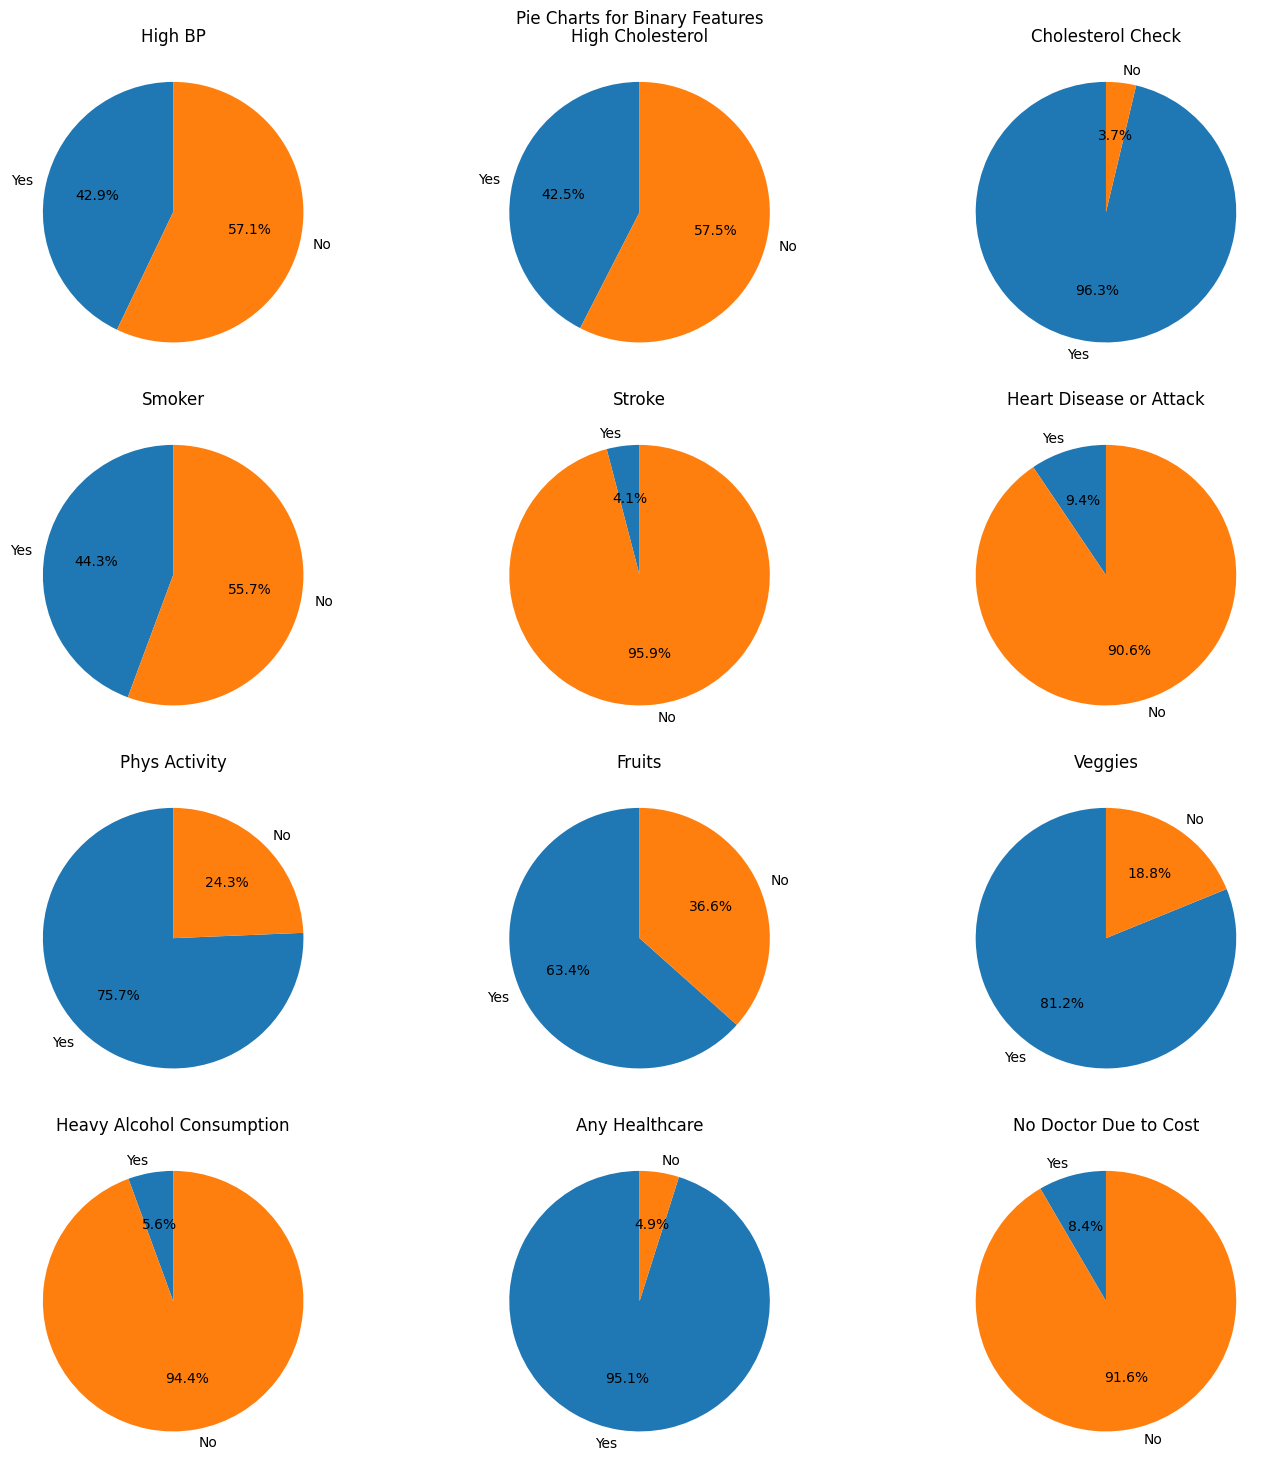

In [ ]:
import matplotlib.pyplot as plt

# Define the data for the pie charts
binary_features = [
    ('High BP', sum(df['HighBP'] == 1), sum(df['HighBP'] == 0)),
    ('High Cholesterol', sum(df['HighChol'] == 1), sum(df['HighChol'] == 0)),
    ('Cholesterol Check', sum(df['CholCheck'] == 1), sum(df['CholCheck'] == 0)),
    ('Smoker', sum(df['Smoker'] == 1), sum(df['Smoker'] == 0)),
    ('Stroke', sum(df['Stroke'] == 1), sum(df['Stroke'] == 0)),
    ('Heart Disease or Attack', sum(df['HeartDiseaseorAttack'] == 1), sum(df['HeartDiseaseorAttack'] == 0)),
    ('Phys Activity', sum(df['PhysActivity'] == 1), sum(df['PhysActivity'] == 0)),
    ('Fruits', sum(df['Fruits'] == 1), sum(df['Fruits'] == 0)),
    ('Veggies', sum(df['Veggies'] == 1), sum(df['Veggies'] == 0)),
    ('Heavy Alcohol Consumption', sum(df['HvyAlcoholConsump'] == 1), sum(df['HvyAlcoholConsump'] == 0)),
    ('Any Healthcare', sum(df['AnyHealthcare'] == 1), sum(df['AnyHealthcare'] == 0)),
    ('No Doctor Due to Cost', sum(df['NoDocbcCost'] == 1), sum(df['NoDocbcCost'] == 0))
]

# Create subplots for pie charts
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
fig.suptitle("Pie Charts for Binary Features")

# Plot pie charts for binary features
for i, (feature, yes_count, no_count) in enumerate(binary_features):
    ax = axes[i // 3, i % 3]
    ax.pie([yes_count, no_count], labels=['Yes', 'No'], autopct='%1.1f%%', startangle=90)
    ax.set_title(feature)

plt.tight_layout()
plt.show()


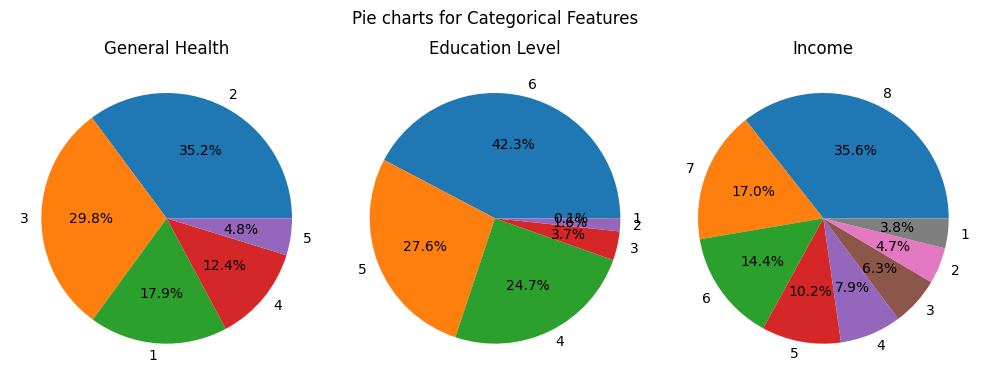

In [ ]:
import matplotlib.pyplot as plt

# Select the data for the categorical features
gen_hlth_counts = df['GenHlth'].value_counts()
education_counts = df['Education'].value_counts()
income_counts = df['Income'].value_counts()

# Plot pie chart for 'GenHlth'
plt.figure(figsize=(10, 4))
plt.subplot(131)  # 1 row, 3 columns, first subplot
plt.pie(gen_hlth_counts, labels=gen_hlth_counts.index, autopct='%1.1f%%')
plt.title('General Health')

# Plot pie chart for 'Education'
plt.subplot(132)  # 1 row, 3 columns, second subplot
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%')
plt.title('Education Level')

# Plot pie chart for 'Income'
plt.subplot(133)  # 1 row, 3 columns, third subplot
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%')
plt.title('Income')

plt.suptitle('Pie charts for Categorical Features')
plt.tight_layout()
plt.show()


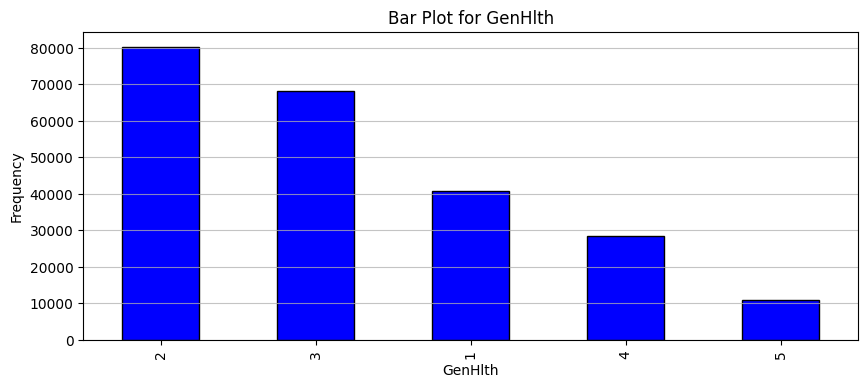

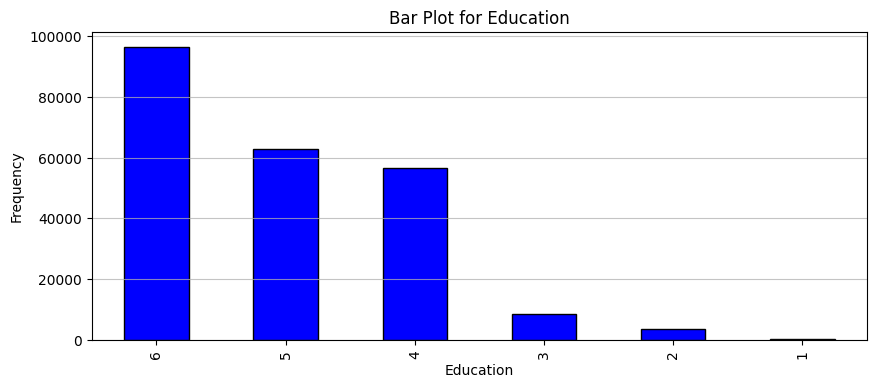

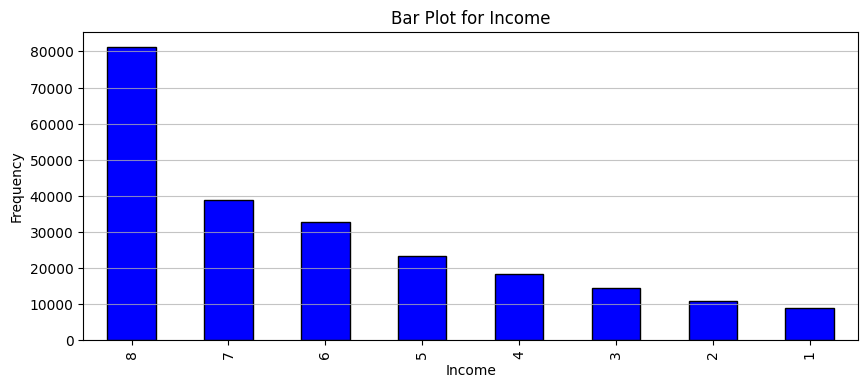

In [ ]:
# List of categorical features to create bar plots for
categorical_features = ["GenHlth", "Education", "Income"]

# Set the number of unique values you want to display on each bar plot
num_unique_values_to_display = 10

# Iterate through the selected categorical features and create bar plots
for feature in categorical_features:
    value_counts = df[feature].value_counts().head(num_unique_values_to_display)
    plt.figure(figsize=(10, 4))
    value_counts.plot(kind='bar', color='blue', edgecolor='black')
    plt.title(f'Bar Plot for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()


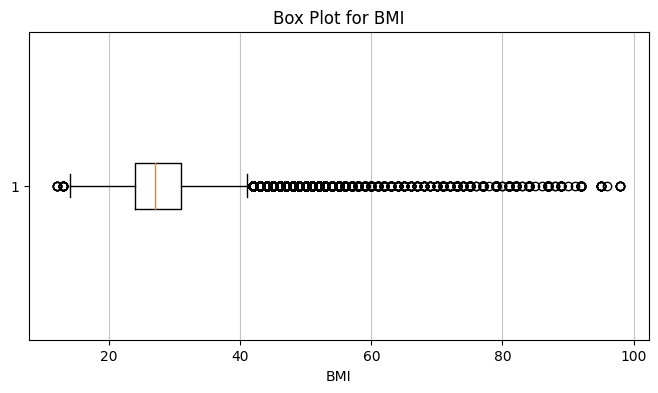

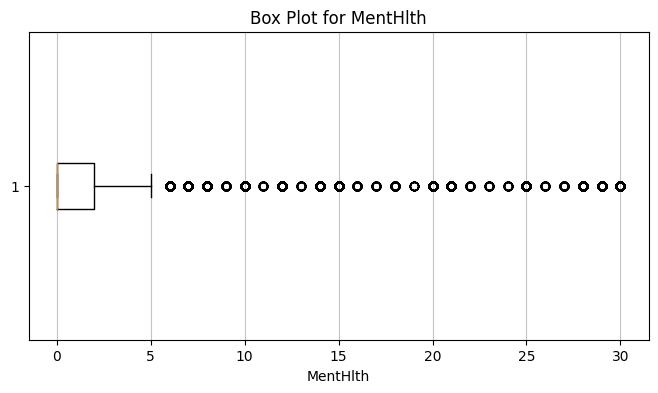

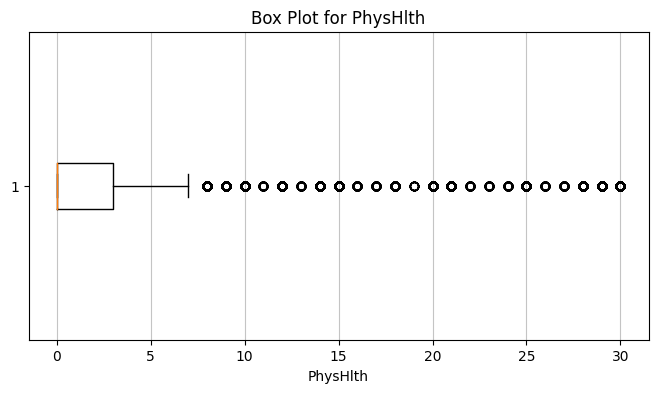

In [ ]:
# List of numerical features to create box plots for
numerical_features = ["BMI", "MentHlth", "PhysHlth"]

# Iterate through the selected numerical features and create box plots
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[feature], vert=False)
    plt.title(f'Box Plot for {feature}')
    plt.xlabel(feature)
    plt.grid(axis='x', alpha=0.75)
    plt.show()


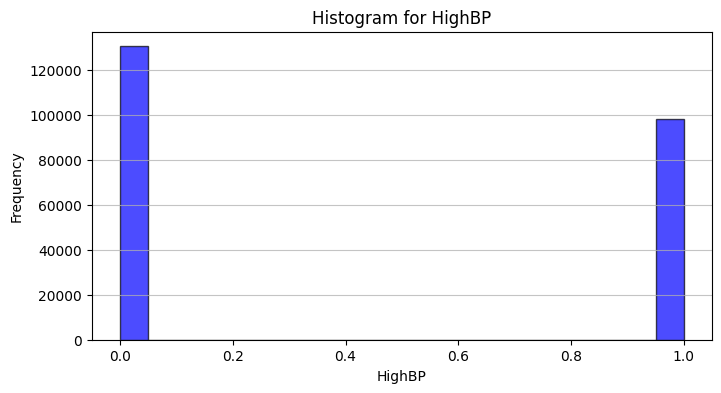

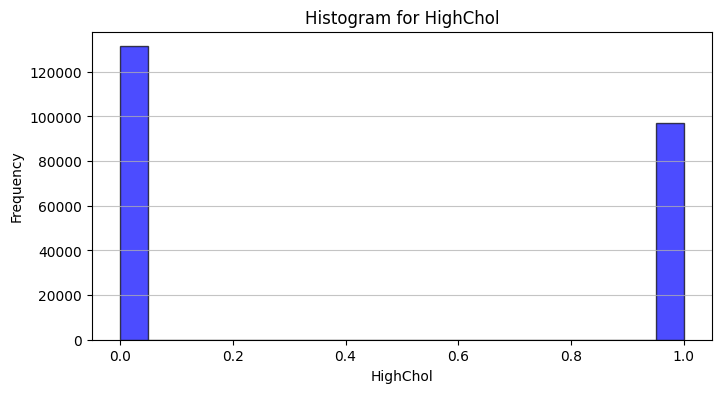

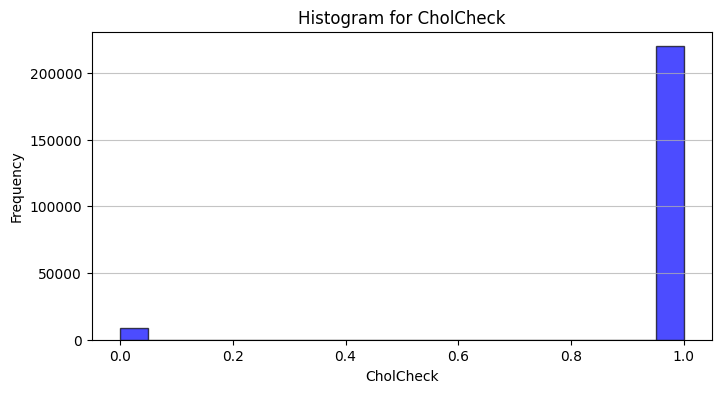

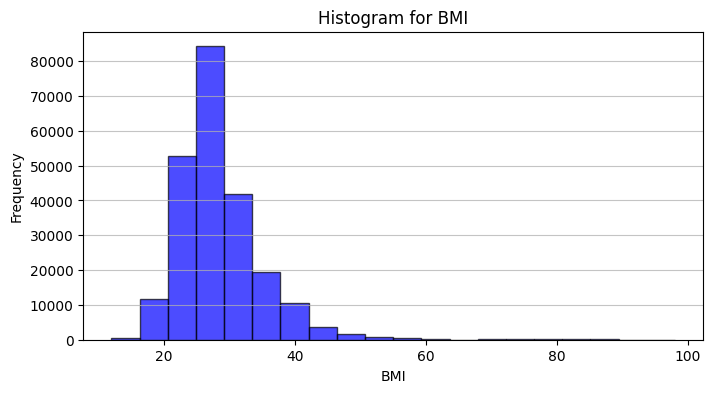

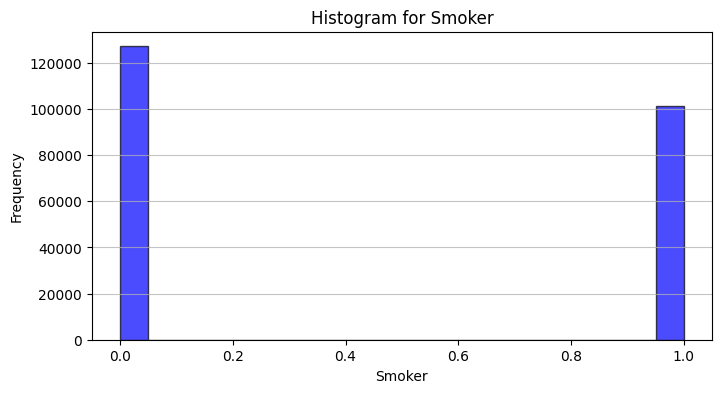

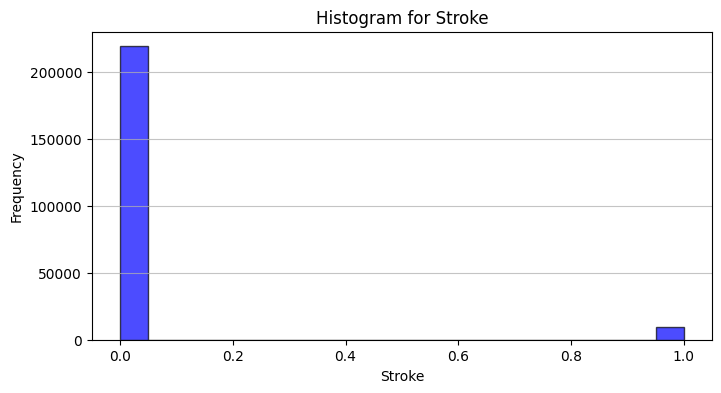

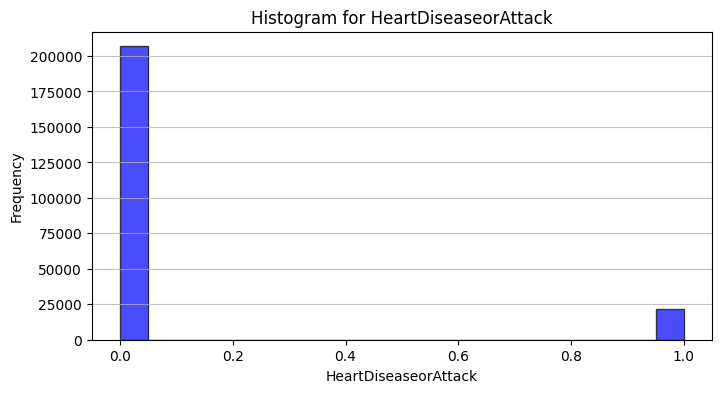

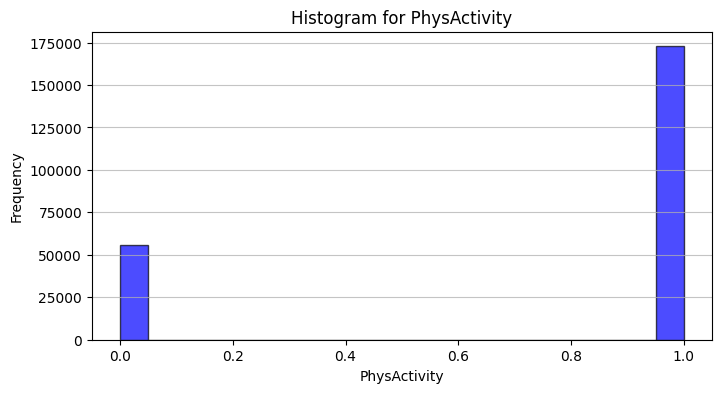

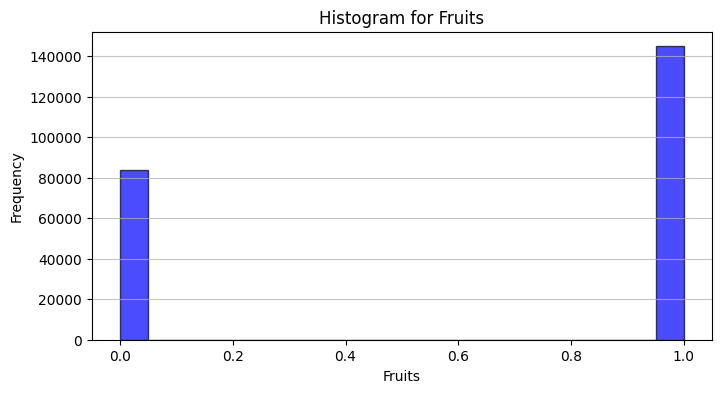

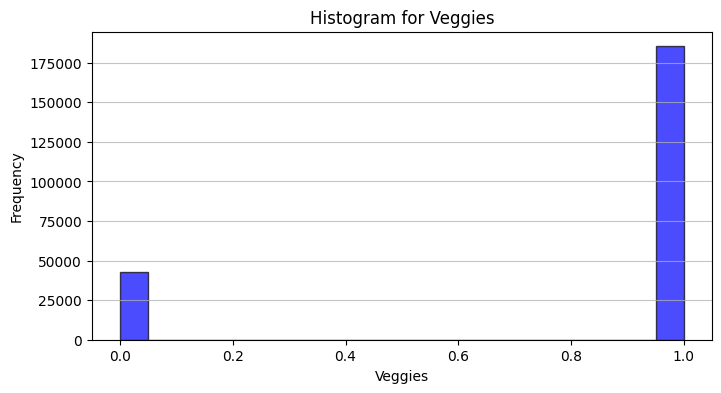

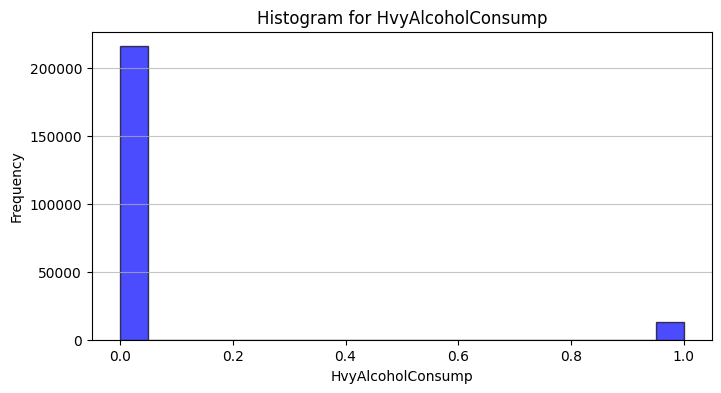

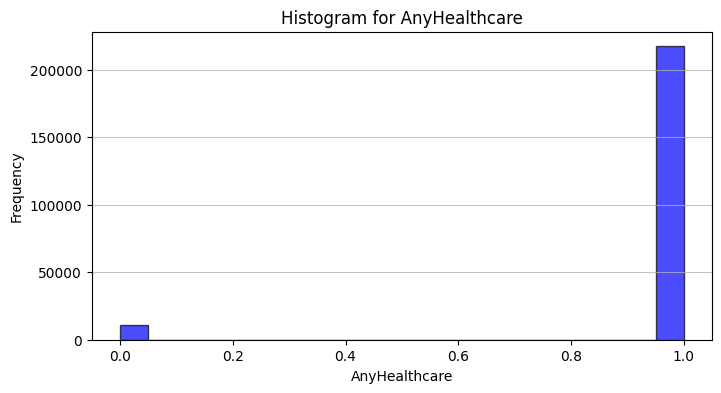

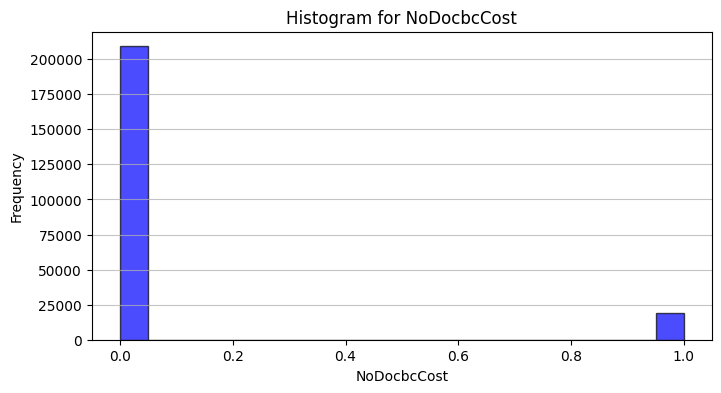

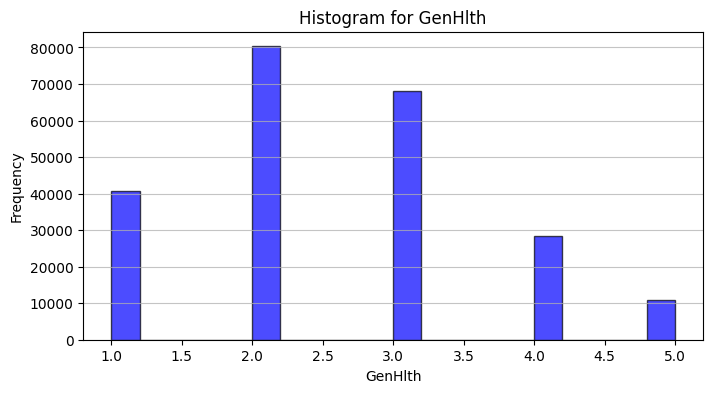

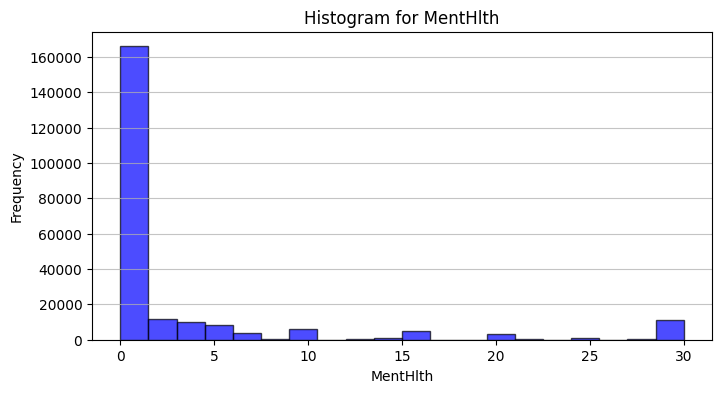

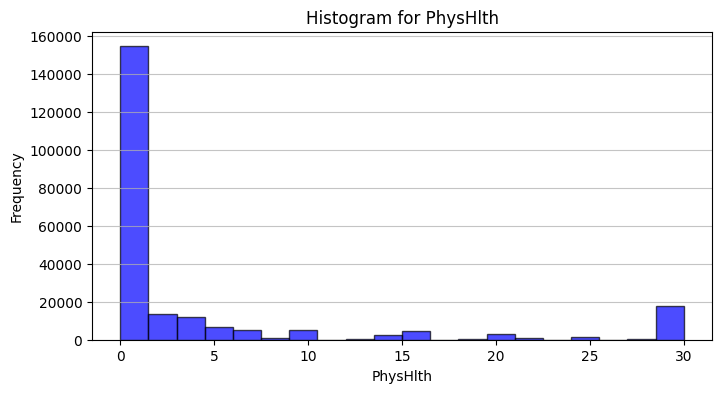

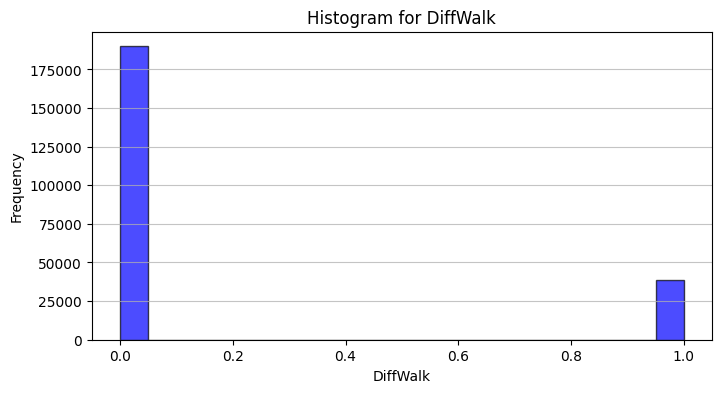

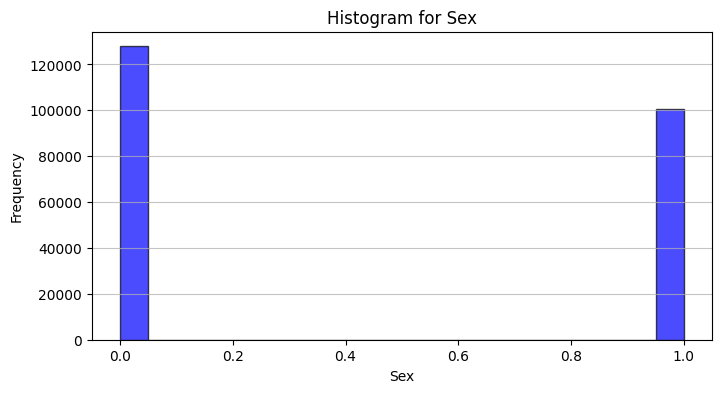

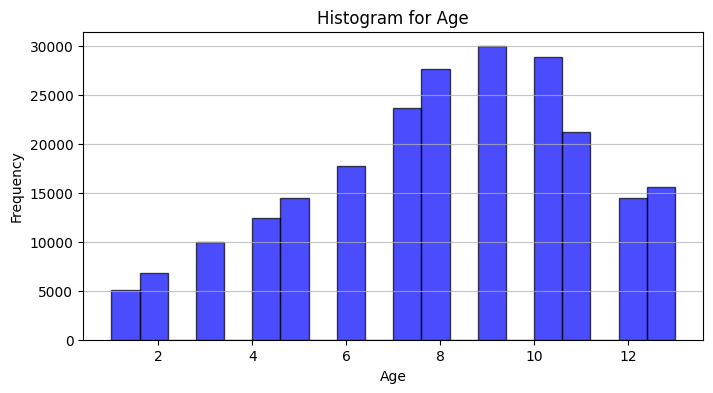

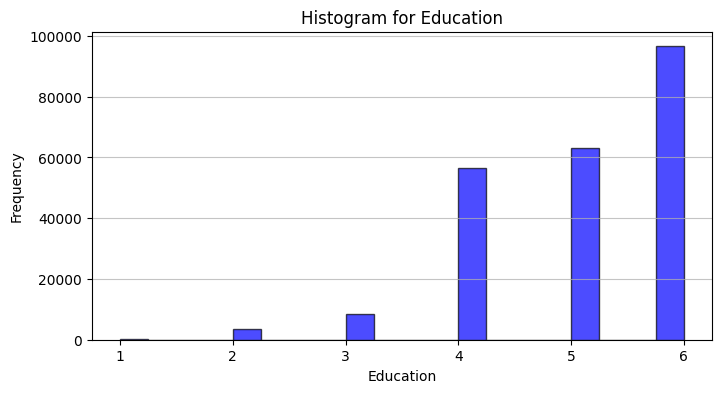

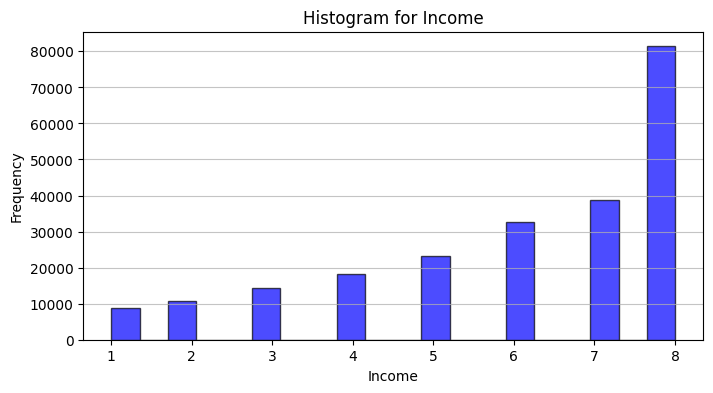

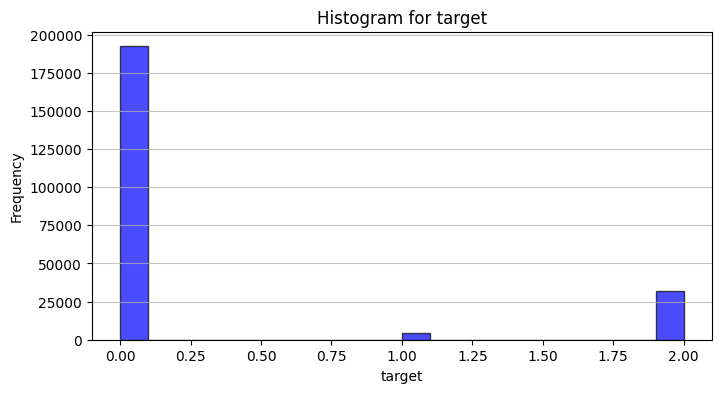

In [ ]:
# Set the number of bins for the histograms (adjust as needed)
num_bins = 20

# Iterate through the features and plot histograms
for col in df.columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col], bins=num_bins, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f'Histogram for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

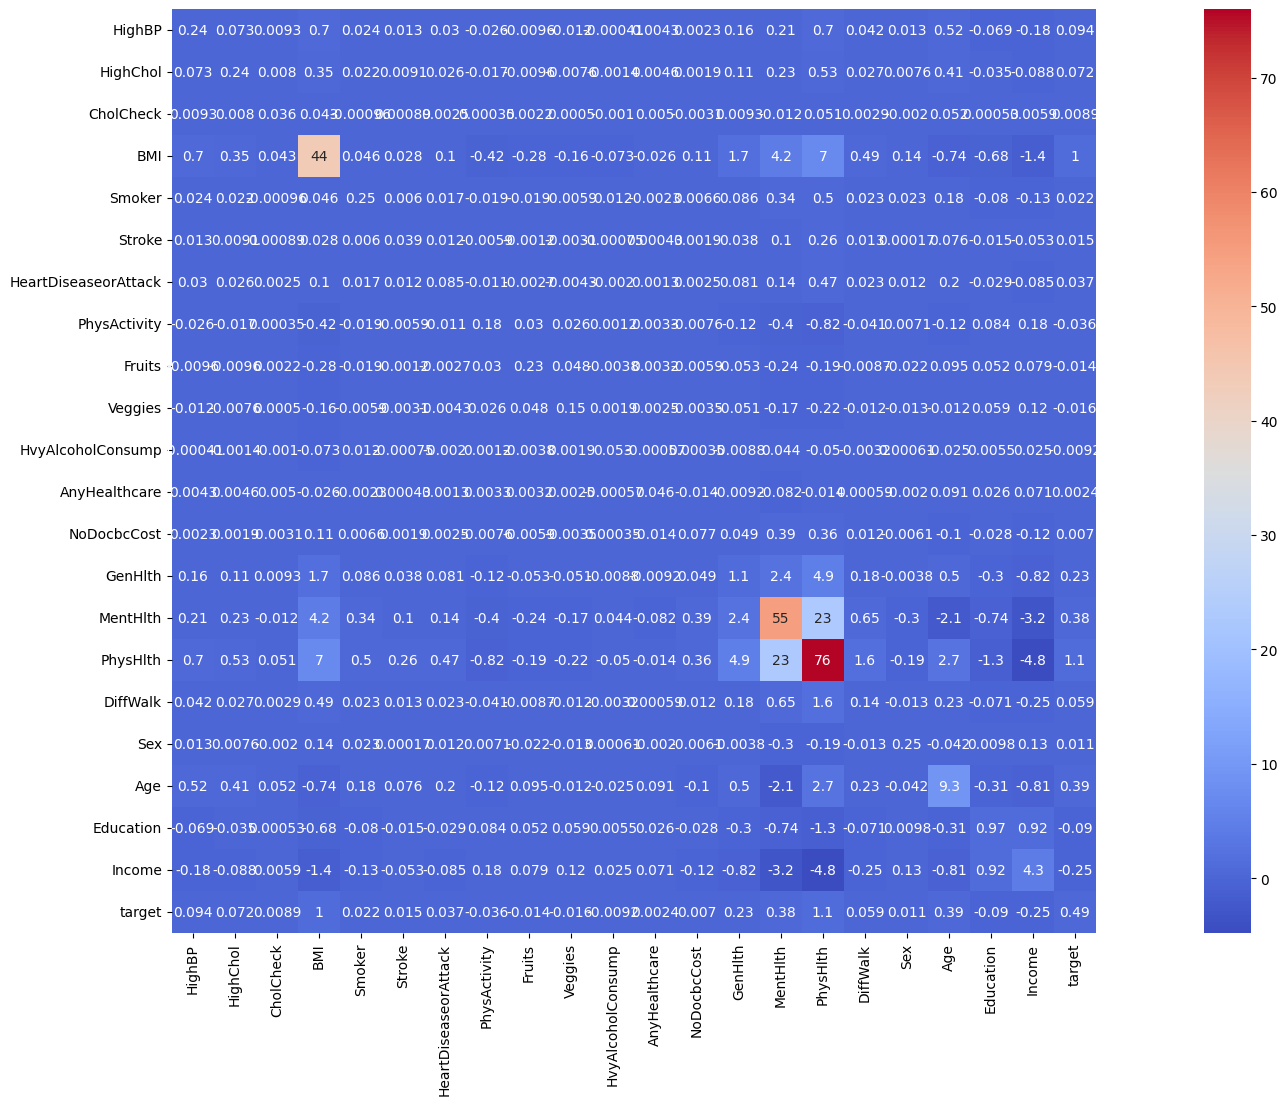

In [ ]:
# plot covariance matrix
cov_matrix = df.cov()
plt.figure(figsize=(28, 12))
sns.heatmap(cov_matrix, annot=True, square=True, cmap='coolwarm')
plt.show()

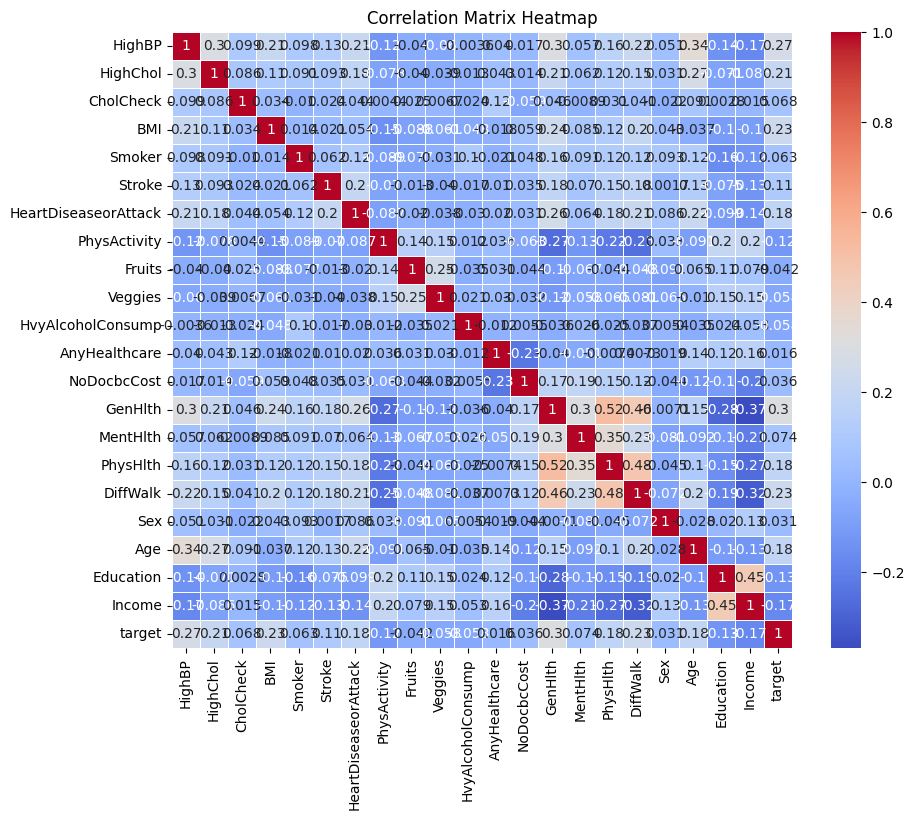

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
#Checking for null values
df.isnull().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
target                  0
dtype: int64

In [3]:
#Checking for duplicated
df.duplicated().sum()

20456

In [4]:
#Drop duplicate rows
df.drop_duplicates(inplace = True)
df.shape

(207856, 22)

DECISION TREE without anything

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Separate features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.7396083902626768
Precision: 0.7528613819717875
Recall: 0.7396083902626768
F1 Score: 0.7460502668291781

Confusion Matrix:
 [[28752   843  4754]
 [  610    32   184]
 [ 4167   267  1963]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85     34349
           1       0.03      0.04      0.03       826
           2       0.28      0.31      0.30      6397

    accuracy                           0.74     41572
   macro avg       0.39      0.39      0.39     41572
weighted avg       0.75      0.74      0.75     41572



DECISION TREE after HYPERPARAMETER TUNING

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Separate features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search with cross-validation
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best hyperparameters to train the final model
best_clf = DecisionTreeClassifier(random_state=42, **best_params)
best_clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = best_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print("Best Hyperparameters:", best_params)
print(f"\nAccuracy with Best Hyperparameters: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}

Accuracy with Best Hyperparameters: 0.8296690079861445
Precision: 0.7789114215934358
Recall: 0.8296690079861445
F1 Score: 0.7874760557377496

Confusion Matrix:
 [[33393     1   955]
 [  749     0    77]
 [ 5297     2  1098]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91     34349
           1       0.00      0.00      0.00       826
           2       0.52      0.17      0.26      6397

    accuracy                           0.83     41572
   macro avg       0.45      0.38      0.39     41572
weighted avg       0.78      0.83      0.79     41572



In [15]:
import pandas as pd

# Assuming y_pred_fs is a NumPy array or a list containing the predicted values
# Create a DataFrame with the predictions
predictions_df = pd.DataFrame({'Predicted_Label': y_pred})

# Specify the path where you want to save the CSV file
csv_path = 'label_predictions_DT.csv'

# Save the DataFrame to a CSV file
predictions_df.to_csv(csv_path, index=False)

In [16]:
label_counts = predictions_df['Predicted_Label'].value_counts()

# Display the label counts
print("Label Counts:")
print(label_counts)

Label Counts:
Predicted_Label
2    40175
0    37922
1    25154
Name: count, dtype: int64


DECISION TREE, RANDOM FOREST, LOGISTIC REGRESSION after HYPERPARAMETER TUNING, STRATIFIED KFOLD and SELECTFROMMODEL, RECURSIVE FEATURE ELIMINATION

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Separate features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Define models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
}

# Define hyperparameters for grid search
param_grids = {
    'Decision Tree': {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]},
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
}

# Define feature selection methods
feature_selection_methods = {
    'SelectFromModel': SelectFromModel,
    'RFE': RFE
}

# Define k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over models
for model_name, model in models.items():
    print(f"\n### {model_name} ###")

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Hyperparameter tuning with GridSearchCV
    if model_name in param_grids:
        param_grid = param_grids[model_name]
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        best_params = grid_search.best_params_
        model = model.set_params(**best_params)
        print(f"Best Hyperparameters: {best_params}")

    # Feature selection
    for fs_method_name, fs_method in feature_selection_methods.items():
        print(f"\n--- {fs_method_name} ---")

        # Initialize feature selection method
        if fs_method_name == 'SelectFromModel':
            fs = fs_method(model, threshold='median')
        elif fs_method_name == 'RFE':
            fs = fs_method(model, n_features_to_select=10)

        # Fit and transform the training set
        X_train_fs = fs.fit_transform(X_train, y_train)

        # Transform the testing set
        X_test_fs = fs.transform(X_test)

        # Train a new classifier on the selected features
        model.fit(X_train_fs, y_train)

        # Make predictions on the testing set
        y_pred_fs = model.predict(X_test_fs)

        # Evaluate the model
        accuracy_fs = accuracy_score(y_test, y_pred_fs)
        precision_fs = precision_score(y_test, y_pred_fs, average='weighted')
        recall_fs = recall_score(y_test, y_pred_fs, average='weighted')
        f1_fs = f1_score(y_test, y_pred_fs, average='weighted')
        conf_matrix_fs = confusion_matrix(y_test, y_pred_fs)
        class_report_fs = classification_report(y_test, y_pred_fs)

        # Print the results
        print(f"\nAccuracy after {fs_method_name}: {accuracy_fs}")
        print(f"Precision: {precision_fs}")
        print(f"Recall: {recall_fs}")
        print(f"F1 Score: {f1_fs}")
        print("\nConfusion Matrix:\n", conf_matrix_fs)
        print("\nClassification Report:\n", class_report_fs)



### Decision Tree ###
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10}

--- SelectFromModel ---

Accuracy after SelectFromModel: 0.8301741556817088
Precision: 0.7807455770389314
Recall: 0.8301741556817088
F1 Score: 0.7895432748534825

Confusion Matrix:
 [[33343     4  1002]
 [  752     0    74]
 [ 5227     1  1169]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91     34349
           1       0.00      0.00      0.00       826
           2       0.52      0.18      0.27      6397

    accuracy                           0.83     41572
   macro avg       0.46      0.38      0.39     41572
weighted avg       0.78      0.83      0.79     41572


--- RFE ---

Accuracy after RFE: 0.829981718464351
Precision: 0.7803994702039355
Recall: 0.829981718464351
F1 Score: 0.7890668039818299

Confusion Matrix:
 [[33350     8   991]
 [  752     0    74]
 [ 5242     1  1154]]

Classification Report:
               pre

In [10]:
!pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable


DECISION TREE, RANDOM FOREST, LOGISTIC REGRESSION after using SMOTE, HYPERPARAMETER TUNING, STRATIFIED KFOLD and RECURSIVE FEATURE ELIMINATION, SELECTKBEST

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Separate features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Define models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression()
}

# Define hyperparameters for grid search
param_grids = {
    'Decision Tree': {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]},
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
}

# Define feature selection methods
feature_selection_methods = {
    'RFE': RFE,
    'SelectKBest': SelectKBest
}

# Define k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over models
for model_name, model in models.items():
    print(f"\n### {model_name} ###")

    # Split the resampled data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

    # Hyperparameter tuning with GridSearchCV
    if model_name in param_grids:
        param_grid = param_grids[model_name]
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        best_params = grid_search.best_params_
        model = model.set_params(**best_params)
        print(f"Best Hyperparameters: {best_params}")

    # Feature selection
    for fs_method_name, fs_method in feature_selection_methods.items():
        print(f"\n--- {fs_method_name} ---")

        # Initialize feature selection method
        if fs_method_name == 'RFE':
            fs = fs_method(model, n_features_to_select=10)
        elif fs_method_name == 'SelectKBest':
            fs = fs_method(f_classif, k=10)

        # Fit and transform the training set
        X_train_fs = fs.fit_transform(X_train, y_train)

        # Transform the testing set
        X_test_fs = fs.transform(X_test)

        # Train a new classifier on the selected features
        model.fit(X_train_fs, y_train)

        # Make predictions on the testing set
        y_pred_fs = model.predict(X_test_fs)

        # Evaluate the model
        accuracy_fs = accuracy_score(y_test, y_pred_fs)
        precision_fs = precision_score(y_test, y_pred_fs, average='weighted')
        recall_fs = recall_score(y_test, y_pred_fs, average='weighted')
        f1_fs = f1_score(y_test, y_pred_fs, average='weighted')
        conf_matrix_fs = confusion_matrix(y_test, y_pred_fs)
        class_report_fs = classification_report(y_test, y_pred_fs)

        # Print the results
        print(f"\nAccuracy after {fs_method_name}: {accuracy_fs}")
        print(f"Precision: {precision_fs}")
        print(f"Recall: {recall_fs}")
        print(f"F1 Score: {f1_fs}")
        print("\nConfusion Matrix:\n", conf_matrix_fs)
        print("\nClassification Report:\n", class_report_fs)



### Decision Tree ###
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None}

--- RFE ---

Accuracy after RFE: 0.8138710520963477
Precision: 0.8119688061540662
Recall: 0.8138710520963477
F1 Score: 0.8104021176881606

Confusion Matrix:
 [[23591  3146  7758]
 [  663 33086   601]
 [ 5130  1920 27356]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.68      0.74     34495
           1       0.87      0.96      0.91     34350
           2       0.77      0.80      0.78     34406

    accuracy                           0.81    103251
   macro avg       0.81      0.81      0.81    103251
weighted avg       0.81      0.81      0.81    103251


--- SelectKBest ---

Accuracy after SelectKBest: 0.7784040832534309
Precision: 0.7756616405159581
Recall: 0.7784040832534309
F1 Score: 0.774647920304309

Confusion Matrix:
 [[22823  4154  7518]
 [ 1291 32031  1028]
 [ 5920  2969 25517]]

Classification Report:
               preci

DECISION TREE, LOGISTIC REGRESSION, RANDOM FOREST after SMOTE using MUTUAL INFORMATION after HYPERPARAMETER TUNING, STRATIFIED KFOLD

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE

# Separate features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Apply SMOTE to the entire dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Specify the number of selected features
no_of_selected_features = 10

# Use SelectKBest with mutual_info_classif for feature selection
selected_features = SelectKBest(mutual_info_classif, k=no_of_selected_features).fit_transform(X_resampled, y_resampled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features, y_resampled, test_size=0.2, random_state=42)

# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
}

# Define hyperparameters for grid search for each classifier
param_grids = {
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]},
    'Decision Tree': {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30]},
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
}

# Define stratified k-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over classifiers
for classifier_name, classifier in classifiers.items():
    print(f"\n### {classifier_name} ###")

    # Perform hyperparameter tuning using GridSearchCV
    param_grid = param_grids[classifier_name]
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=stratified_kfold, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_

    # Update the classifier with the best hyperparameters
    classifier.set_params(**best_params)

    # Train the classifier on the training set
    classifier.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = classifier.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    classification_report_text = classification_report(y_test, y_pred)

    # Print the results
    print(f"Best Hyperparameters: {best_params}")
    print(f"\nAccuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")
    print("\nClassification Report:\n", classification_report_text)



### Random Forest ###
Best Hyperparameters: {'max_depth': 20, 'n_estimators': 200}

Accuracy: 0.658
Precision: 0.660
Recall: 0.658
F1 Score: 0.656

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.57      0.63     34495
           1       0.66      0.76      0.70     34350
           2       0.63      0.65      0.64     34406

    accuracy                           0.66    103251
   macro avg       0.66      0.66      0.66    103251
weighted avg       0.66      0.66      0.66    103251


### Decision Tree ###
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 30}

Accuracy: 0.651
Precision: 0.652
Recall: 0.651
F1 Score: 0.649

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.58      0.62     34495
           1       0.65      0.76      0.70     34350
           2       0.64      0.61      0.62     34406

    accuracy                           0.65    10325

DECISION TREE, LOGISTIC REGRESSION, RANDOM FOREST using MUTUAL INFORMATION after HYPERPARAMETER TUNING, STRATIFIED KFOLD

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Separate features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Specify the number of selected features
no_of_selected_features = 10

# Use SelectKBest with mutual_info_classif for feature selection
selected_features = SelectKBest(mutual_info_classif, k=no_of_selected_features).fit_transform(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features, y, test_size=0.2, random_state=42)

# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
}

# Define hyperparameters for grid search for each classifier
param_grids = {
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]},
    'Decision Tree': {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30]},
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
}

# Define stratified k-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over classifiers
for classifier_name, classifier in classifiers.items():
    print(f"\n### {classifier_name} ###")

    # Perform hyperparameter tuning using GridSearchCV
    param_grid = param_grids[classifier_name]
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=stratified_kfold, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_

    # Update the classifier with the best hyperparameters
    classifier.set_params(**best_params)

    # Train the classifier on the training set
    classifier.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = classifier.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    classification_report_text = classification_report(y_test, y_pred)

    # Print the results
    print(f"Best Hyperparameters: {best_params}")
    print(f"\nAccuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")
    print("\nClassification Report:\n", classification_report_text)



### Random Forest ###
Best Hyperparameters: {'max_depth': 10, 'n_estimators': 50}

Accuracy: 0.832
Precision: 0.782
Recall: 0.832
F1 Score: 0.781

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.98      0.91     34349
           1       0.00      0.00      0.00       826
           2       0.56      0.12      0.20      6397

    accuracy                           0.83     41572
   macro avg       0.47      0.37      0.37     41572
weighted avg       0.78      0.83      0.78     41572


### Decision Tree ###
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10}

Accuracy: 0.830
Precision: 0.780
Recall: 0.830
F1 Score: 0.788

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91     34349
           1       0.00      0.00      0.00       826
           2       0.52      0.17      0.26      6397

    accuracy                           0.83     41572

GRADIENT BOOSTING after HYPERPARAMETER TUNING, STRATIFIED KFOLD

In [8]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Separate features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Initialize the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier()

# Define hyperparameters for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with StratifiedKFold
grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=stratified_kfold, scoring='accuracy')

# Perform grid search with cross-validation
grid_search.fit(X, y)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best hyperparameters to train the final model
gb_clf_best = GradientBoostingClassifier(**best_params)

# Initialize StratifiedKFold for final evaluation
stratified_kfold_final = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize variables for overall evaluation metrics
overall_accuracy_gb = 0
overall_precision_gb = 0
overall_recall_gb = 0
overall_f1_gb = 0

# Iterate over StratifiedKFold splits for final evaluation
for train_index, test_index in stratified_kfold_final.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the final model on the training set
    gb_clf_best.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred_gb = gb_clf_best.predict(X_test)

    # Evaluate the model for this fold
    accuracy_gb = accuracy_score(y_test, y_pred_gb)
    precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
    recall_gb = recall_score(y_test, y_pred_gb, average='weighted')
    f1_gb = f1_score(y_test, y_pred_gb, average='weighted')

    # Update overall evaluation metrics
    overall_accuracy_gb += accuracy_gb
    overall_precision_gb += precision_gb
    overall_recall_gb += recall_gb
    overall_f1_gb += f1_gb

# Calculate average evaluation metrics over all folds
average_accuracy_gb = overall_accuracy_gb / 5
average_precision_gb = overall_precision_gb / 5
average_recall_gb = overall_recall_gb / 5
average_f1_gb = overall_f1_gb / 5

# Print the results
print("Best Hyperparameters:", best_params)
print(f"\nAverage Accuracy with Best Hyperparameters: {average_accuracy_gb}")
print(f"Average Precision: {average_precision_gb}")
print(f"Average Recall: {average_recall_gb}")
print(f"Average F1 Score: {average_f1_gb}")


Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 200, 'subsample': 0.8}

Average Accuracy with Best Hyperparameters: 0.8362135309490565
Average Precision: 0.7901871177775573
Average Recall: 0.8362135309490565
Average F1 Score: 0.7960687858814415


GRADIENT BOOSTING after HYPERPARAMETER TUNING

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Separate features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier()

# Define hyperparameters for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search with cross-validation
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best hyperparameters to train the final model
gb_clf_best = GradientBoostingClassifier(**best_params)
gb_clf_best.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_gb = gb_clf_best.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

# Print the results
print("Best Hyperparameters:", best_params)
print(f"\nAccuracy with Best Hyperparameters: {accuracy_gb}")
print(f"Precision: {precision_gb}")
print(f"Recall: {recall_gb}")
print(f"F1 Score: {f1_gb}")
print("\nConfusion Matrix:\n", conf_matrix_gb)
print("\nClassification Report:\n", class_report_gb)


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 200, 'subsample': 0.8}

Accuracy with Best Hyperparameters: 0.8335899162898105
Precision: 0.786847741972965
Recall: 0.8335899162898105
F1 Score: 0.7932256589128274

Confusion Matrix:
 [[33431     0   918]
 [  754     0    72]
 [ 5174     0  1223]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91     34349
           1       0.00      0.00      0.00       826
           2       0.55      0.19      0.28      6397

    accuracy                           0.83     41572
   macro avg       0.47      0.39      0.40     41572
weighted avg       0.79      0.83      0.79     41572



ADABOOST after HYPERPARAMETER TUNING, STRATIFIED KFOLD and SELECTFROMMODEL, RECURSIVE FEATURE ELIMINATION

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Separate features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Define models
models = {
    'AdaBoost': AdaBoostClassifier()
}

# Define hyperparameters for grid search
param_grids = {
    'AdaBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.001, 0.01, 0.1, 1, 10]}
}

# Define feature selection methods
feature_selection_methods = {
    'SelectFromModel': SelectFromModel,
    'RFE': RFE
}

# Define k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over models
for model_name, model in models.items():
    print(f"\n### {model_name} ###")
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Hyperparameter tuning with GridSearchCV
    if model_name in param_grids:
        param_grid = param_grids[model_name]
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        best_params = grid_search.best_params_
        model = model.set_params(**best_params)
        print(f"Best Hyperparameters: {best_params}")
    
    # Feature selection
    for fs_method_name, fs_method in feature_selection_methods.items():
        print(f"\n--- {fs_method_name} ---")
        
        # Initialize feature selection method
        if fs_method_name == 'SelectFromModel':
            fs = fs_method(model, threshold='median')
        elif fs_method_name == 'RFE':
            fs = fs_method(model, n_features_to_select=10)
        
        # Fit and transform the training set
        X_train_fs = fs.fit_transform(X_train, y_train)
        
        # Transform the testing set
        X_test_fs = fs.transform(X_test)
        
        # Train a new classifier on the selected features
        model.fit(X_train_fs, y_train)
        
        # Make predictions on the testing set
        y_pred_fs = model.predict(X_test_fs)
        
        # Evaluate the model
        accuracy_fs = accuracy_score(y_test, y_pred_fs)
        precision_fs = precision_score(y_test, y_pred_fs, average='weighted')
        recall_fs = recall_score(y_test, y_pred_fs, average='weighted')
        f1_fs = f1_score(y_test, y_pred_fs, average='weighted')
        conf_matrix_fs = confusion_matrix(y_test, y_pred_fs)
        class_report_fs = classification_report(y_test, y_pred_fs)
        
        # Print the results
        print(f"\nAccuracy after {fs_method_name}: {accuracy_fs}")
        print(f"Precision: {precision_fs}")
        print(f"Recall: {recall_fs}")
        print(f"F1 Score: {f1_fs}")
        print("\nConfusion Matrix:\n", conf_matrix_fs)
        print("\nClassification Report:\n", class_report_fs)



### AdaBoost ###
Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 200}

--- SelectFromModel ---

Accuracy after SelectFromModel: 0.8329885499855673
Precision: 0.7846727860023007
Recall: 0.8329885499855673
F1 Score: 0.7872207451356629

Confusion Matrix:
 [[33628     0   721]
 [  764     0    62]
 [ 5396     0  1001]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91     34349
           1       0.00      0.00      0.00       826
           2       0.56      0.16      0.24      6397

    accuracy                           0.83     41572
   macro avg       0.47      0.38      0.38     41572
weighted avg       0.78      0.83      0.79     41572


--- RFE ---

Accuracy after RFE: 0.8330366592899067
Precision: 0.7848038122713962
Recall: 0.8330366592899067
F1 Score: 0.7878415432569436

Confusion Matrix:
 [[33608     0   741]
 [  762     0    64]
 [ 5374     0  1023]]

Classification Report:
               p

DECISION TREE, RANDOM FOREST, LOGISTIC REGRESSION after using SMOTE, HYPERPARAMETER TUNING, STRATIFIED KFOLD and RFE USING CROSS VALIDATION

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, SelectKBest, f_classif, RFECV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Separate features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Define models (excluding Naive Bayes)
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression()
}

# Define hyperparameters for grid search
param_grids = {
    'Decision Tree': {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]},
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
}

# Define feature selection methods
feature_selection_methods = {
    'RFECV': RFECV
}

# Define k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over models
for model_name, model in models.items():
    print(f"\n### {model_name} ###")

    # Split the resampled data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

    # Hyperparameter tuning with GridSearchCV
    if model_name in param_grids:
        param_grid = param_grids[model_name]
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        best_params = grid_search.best_params_
        model = model.set_params(**best_params)
        print(f"Best Hyperparameters: {best_params}")

    # Feature selection
    for fs_method_name, fs_method in feature_selection_methods.items():
        print(f"\n--- {fs_method_name} ---")

        # Initialize feature selection method
        if fs_method_name == 'RFECV':
            fs = fs_method(model, step=1, cv=kfold)

        # Fit and transform the training set
        X_train_fs = fs.fit_transform(X_train, y_train)

        # Transform the testing set
        X_test_fs = fs.transform(X_test)

        # Train a new classifier on the selected features
        model.fit(X_train_fs, y_train)

        # Make predictions on the testing set
        y_pred_fs = model.predict(X_test_fs)

        # Evaluate the model
        accuracy_fs = accuracy_score(y_test, y_pred_fs)
        precision_fs = precision_score(y_test, y_pred_fs, average='weighted')
        recall_fs = recall_score(y_test, y_pred_fs, average='weighted')
        f1_fs = f1_score(y_test, y_pred_fs, average='weighted')
        conf_matrix_fs = confusion_matrix(y_test, y_pred_fs)
        class_report_fs = classification_report(y_test, y_pred_fs)

        # Print the results
        print(f"\nAccuracy after {fs_method_name}: {accuracy_fs}")
        print(f"Precision: {precision_fs}")
        print(f"Recall: {recall_fs}")
        print(f"F1 Score: {f1_fs}")
        print("\nConfusion Matrix:\n", conf_matrix_fs)
        print("\nClassification Report:\n", class_report_fs)



### Decision Tree ###
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None}

--- RFECV ---

Accuracy after RFECV: 0.8436431608410573
Precision: 0.8430795412342452
Recall: 0.8436431608410573
F1 Score: 0.8407007101472469

Confusion Matrix:
 [[24356  2337  7802]
 [  359 33736   255]
 [ 4413   978 29015]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.71      0.77     34495
           1       0.91      0.98      0.94     34350
           2       0.78      0.84      0.81     34406

    accuracy                           0.84    103251
   macro avg       0.84      0.84      0.84    103251
weighted avg       0.84      0.84      0.84    103251


### Random Forest ###
Best Hyperparameters: {'max_depth': None, 'n_estimators': 200}

--- RFECV ---

Accuracy after RFECV: 0.8895991322117945
Precision: 0.8912513888255342
Recall: 0.8895991322117945
F1 Score: 0.8887573732571888

Confusion Matrix:
 [[27106   792  6597]
 [  301 

DECISION TREE, RANDOM FOREST, LOGISTIC REGRESSION after using SMOTE only in the training data, HYPERPARAMETER TUNING, STRATIFIED KFOLD and RECURSIVE FEATURE ELIMINATION, SELECTKBEST, RFE USING CV

In [12]:
import pandas as pd

# Assuming y_pred_fs is a NumPy array or a list containing the predicted values
# Create a DataFrame with the predictions
predictions_df = pd.DataFrame({'Predicted_Label': y_pred_fs})

# Specify the path where you want to save the CSV file
csv_path = 'label_predictions.csv'

# Save the DataFrame to a CSV file
predictions_df.to_csv(csv_path, index=False)



In [13]:
label_counts = predictions_df['Predicted_Label'].value_counts()

# Display the label counts
print("Label Counts:")
print(label_counts)

Label Counts:
Predicted_Label
2    37613
1    35037
0    30601
Name: count, dtype: int64


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, SelectKBest, f_classif, RFECV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Separate features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Define models (excluding Naive Bayes)
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression()
}

# Define hyperparameters for grid search
param_grids = {
    'Decision Tree': {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]},
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
}

# Define feature selection methods
feature_selection_methods = {
    'RFE': RFE,
    'SelectKBest': SelectKBest,
    'RFECV': RFECV
}

# Define k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over models
for model_name, model in models.items():
    print(f"\n### {model_name} ###")

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Apply SMOTE only to the training data
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Hyperparameter tuning with GridSearchCV
    if model_name in param_grids:
        param_grid = param_grids[model_name]
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy')
        grid_search.fit(X_train_resampled, y_train_resampled)
        best_params = grid_search.best_params_
        model = model.set_params(**best_params)
        print(f"Best Hyperparameters: {best_params}")

    # Feature selection
    for fs_method_name, fs_method in feature_selection_methods.items():
        print(f"\n--- {fs_method_name} ---")

        # Initialize feature selection method
        if fs_method_name == 'RFE':
            fs = fs_method(model, n_features_to_select=10)
        elif fs_method_name == 'SelectKBest':
            fs = fs_method(f_classif, k=10)  # You can adjust the number of features to select
        elif fs_method_name == 'RFECV':
            fs = fs_method(model, step=1, cv=kfold)

        # Fit and transform the training set
        X_train_fs = fs.fit_transform(X_train_resampled, y_train_resampled)

        # Transform the testing set
        X_test_fs = fs.transform(X_test)

        # Train a new classifier on the selected features
        model.fit(X_train_fs, y_train_resampled)

        # Make predictions on the testing set
        y_pred_fs = model.predict(X_test_fs)

        # Evaluate the model
        accuracy_fs = accuracy_score(y_test, y_pred_fs)
        precision_fs = precision_score(y_test, y_pred_fs, average='weighted')
        recall_fs = recall_score(y_test, y_pred_fs, average='weighted')
        f1_fs = f1_score(y_test, y_pred_fs, average='weighted')
        conf_matrix_fs = confusion_matrix(y_test, y_pred_fs)
        class_report_fs = classification_report(y_test, y_pred_fs)

        # Print the results
        print(f"\nAccuracy after {fs_method_name}: {accuracy_fs}")
        print(f"Precision: {precision_fs}")
        print(f"Recall: {recall_fs}")
        print(f"F1 Score: {f1_fs}")
        print("\nConfusion Matrix:\n", conf_matrix_fs)
        print("\nClassification Report:\n", class_report_fs)



### Decision Tree ###
Best Hyperparameters: {'criterion': 'gini', 'max_depth': None}

--- RFE ---

Accuracy after RFE: 0.6475271817569518
Precision: 0.7569339352262602
Recall: 0.6475271817569518
F1 Score: 0.6922342450879152

Confusion Matrix:
 [[24246  2858  7245]
 [  467   102   257]
 [ 3224   602  2571]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.71      0.78     34349
           1       0.03      0.12      0.05       826
           2       0.26      0.40      0.31      6397

    accuracy                           0.65     41572
   macro avg       0.38      0.41      0.38     41572
weighted avg       0.76      0.65      0.69     41572


--- SelectKBest ---

Accuracy after SelectKBest: 0.6342009044549216
Precision: 0.7571299834076062
Recall: 0.6342009044549217
F1 Score: 0.6840353490366633

Confusion Matrix:
 [[23712  3317  7320]
 [  447    90   289]
 [ 3131   703  2563]]

Classification Report:
               precisi

KeyboardInterrupt: 

SVM

In [16]:
from sklearn.svm import SVC

# Separate features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Support Vector Machine Classifier
svm_clf = SVC()

# Define hyperparameters for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm_clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search with cross-validation
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best hyperparameters to train the final model
svm_clf_best = SVC(**best_params)
svm_clf_best.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_svm = svm_clf_best.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

# Print the results
print("Best Hyperparameters:", best_params)
print(f"\nAccuracy with Best Hyperparameters: {accuracy_svm}")
print(f"Precision: {precision_svm}")
print(f"Recall: {recall_svm}")
print(f"F1 Score: {f1_svm}")
print("\nConfusion Matrix:\n", conf_matrix_svm)
print("\nClassification Report:\n", class_report_svm)
